In [16]:
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import matplotlib.pyplot as plt

# #S3 paths
#INPUT_PATH = r's3://mercy-locust-covid19-in-dev/inbound/sourcedata/Spatial/'
#OUTPUT_PATH = r's3://mercy-locust-covid19-out-dev/location_dim/'
#local paths
INPUT_PATH = r'data/input/'
OUTPUT_PATH = r'data/output/'

In [17]:
file_name_1='UA_Eggs_AF.xlsx'
file_name_2='UA_Milk_AF.xlsx'
file_name_3='UA_Mutt_AF.xlsx'
file_name_4='UA_Pork_AF.xlsx'
file_name_5='UA_Pou_AF.xlsx'
file_name_6='UrbanAreas_Beef_Africa.xlsx'

In [18]:
df_egg = pd.read_excel(INPUT_PATH + file_name_1)
df_milk = pd.read_excel(INPUT_PATH + file_name_2)
df_mutt = pd.read_excel(INPUT_PATH + file_name_3)
df_pork = pd.read_excel(INPUT_PATH + file_name_4)
df_pou = pd.read_excel(INPUT_PATH + file_name_5)
df_beef = pd.read_excel(INPUT_PATH + file_name_6)

In [19]:
df_egg=df_egg.drop(['NEW_URBID','ISO3','Continent','SQKM_FINAL'], axis=1)
df_milk=df_milk.drop(['NEW_URBID','ISO3','Continent','SQKM_FINAL','WB_Region_2010'], axis=1)
df_mutt=df_mutt.drop(['NEW_URBID','ISO3','Continent','SQKM_FINAL','WB_Region_2010'], axis=1)
df_pork=df_pork.drop(['NEW_URBID','ISO3','Continent','SQKM_FINAL','WB_Region_2010'], axis=1)
df_pou=df_pou.drop(['NEW_URBID','ISO3','Continent','SQKM_FINAL','WB_Region_2010'], axis=1)
df_beef=df_beef.drop(['NEW_URBID','ISO3','Continent','SQKM_FINAL','WB_Region_2010'], axis=1)

In [20]:
countries=['Ethiopia','Kenya','Somalia','Uganda']

In [21]:
df_egg=df_egg[df_egg['ADM0_Name'].isin(countries)]
df_milk=df_milk[df_milk['ADM0_Name'].isin(countries)]
df_mutt=df_mutt[df_mutt['ADM0_Name'].isin(countries)]
df_pork=df_pork[df_pork['ADM0_Name'].isin(countries)]
df_pou=df_pou[df_pou['ADM0_Name'].isin(countries)]
df_beef=df_beef[df_beef['ADM0_Name'].isin(countries)]

In [22]:
df_egg.head()

,NAME,ADM0_Name,ES00POP,UA_pop30,Egg_Cons00,Egg_Cons30,Egg_UA_T
1207,ADIGRAT,Ethiopia,48231,171696.768539,30.8042,234.5760,0.234490
1208,ADWA,Ethiopia,31605,112510.136005,20.1806,153.6770,0.153621
1209,AXUM,Ethiopia,34994,124574.583116,22.3766,170.4000,0.170338
1210,ENDASILASIE,Ethiopia,32572,115952.543900,13.6588,48.3752,0.039950
1211,MAKALLE,Ethiopia,132545,471844.833945,130.7020,995.3040,0.994939


In [23]:
df_egg = df_egg.rename(columns={'Egg_Cons00': 'Cons00', 'Egg_Cons30': 'Cons30', 'Egg_UA_T': 'UA_T'})
df_milk = df_milk.rename(columns={'Milk_Cons00': 'Cons00', 'Milk_Cons30': 'Cons30', 'Mlk_UA_T': 'UA_T'})
df_mutt = df_mutt.rename(columns={'Mut_Cons00': 'Cons00', 'Mut_Cons30': 'Cons30', 'Mut_UA_T': 'UA_T'})
df_pork = df_pork.rename(columns={'Pork_Cons00': 'Cons00', 'Pork_Cons30': 'Cons30', 'Pork_UA_T': 'UA_T'})
df_pou = df_pou.rename(columns={'Pou_Cons00': 'Cons00', 'Pou_Cons30': 'Cons30', 'Pou_UA_T': 'UA_T'})
df_beef = df_beef.rename(columns={'Beef_Cons00': 'Cons00', 'Beef_Cons30': 'Cons30', 'Beef_UA_T': 'UA_T'})


In [24]:
df_egg.head()

,NAME,ADM0_Name,ES00POP,UA_pop30,Cons00,Cons30,UA_T
1207,ADIGRAT,Ethiopia,48231,171696.768539,30.8042,234.5760,0.234490
1208,ADWA,Ethiopia,31605,112510.136005,20.1806,153.6770,0.153621
1209,AXUM,Ethiopia,34994,124574.583116,22.3766,170.4000,0.170338
1210,ENDASILASIE,Ethiopia,32572,115952.543900,13.6588,48.3752,0.039950
1211,MAKALLE,Ethiopia,132545,471844.833945,130.7020,995.3040,0.994939


In [25]:
df_egg.insert(7, 'dm_commodity_name','egg consumption') #insert column at specified location (column 7 here)
df_milk.insert(7, 'dm_commodity_name','milk consumption')
df_mutt.insert(7, 'dm_commodity_name','mutton consumption')
df_pork.insert(7, 'dm_commodity_name','pork consumption')
df_pou.insert(7, 'dm_commodity_name','poultry consumption')
df_beef.insert(7, 'dm_commodity_name','beef consumption')

In [26]:
df_egg.head()

,NAME,ADM0_Name,ES00POP,UA_pop30,Cons00,Cons30,UA_T,dm_commodity_name
1207,ADIGRAT,Ethiopia,48231,171696.768539,30.8042,234.5760,0.234490,egg consumption
1208,ADWA,Ethiopia,31605,112510.136005,20.1806,153.6770,0.153621,egg consumption
1209,AXUM,Ethiopia,34994,124574.583116,22.3766,170.4000,0.170338,egg consumption
1210,ENDASILASIE,Ethiopia,32572,115952.543900,13.6588,48.3752,0.039950,egg consumption
1211,MAKALLE,Ethiopia,132545,471844.833945,130.7020,995.3040,0.994939,egg consumption


In [27]:
frames= pd.concat([df_egg, df_milk, df_mutt, df_pork, df_pou, df_beef]) #called 'frames' for all dataframes

In [28]:
#Now we need to fit exponential growth on the two data points Cons00 (amount consumed in tonnes in 2000)
#and Cons30 (amount predicted to be consumed in 2030).
#From these we need to fit a curve and interpolate the amount consumed this year.

initial = frames['Cons00']
final = frames['Cons30']

def get_exp_growth(year, number = 0):
    r = ((frames['Cons30']/frames['Cons00']) ** (1/30) ) - 1

    if number != 0:
        cons = frames['Cons00'][number] * ((1+ r[number])**year)
    else:
        cons = frames['Cons00'] * ((1+ r)**year)
    return cons
    
#Add this to frames:
frames['value'] = get_exp_growth(20) #value is current consumption
frames['value15'] = get_exp_growth(15) #value is current consumption
frames['value16'] = get_exp_growth(16) #value is current consumption
frames['value17'] = get_exp_growth(17) #value is current consumption
frames['value18'] = get_exp_growth(18) #value is current consumption
frames['value19'] = get_exp_growth(19) #value is current consumption


In [29]:
conditions = [
    (frames['dm_commodity_name'] == 'egg consumption'), #if entry satisfied multiple conditions the first one satisfied is taken
    (frames['dm_commodity_name'] == 'milk consumption'),
    (frames['dm_commodity_name'] == 'mutton consumption'),
    (frames['dm_commodity_name'] == 'pork consumption'),
   (frames['dm_commodity_name'] == 'poultry consumption'),
    (frames['dm_commodity_name'] == 'beef consumption')]
    
choices = ['21', '20', '24', '25', '23', '22'] 
frames['measureID'] = np.select(conditions, choices) #assign an ID to each of the different types of conditions

In [30]:
frames.head()


,NAME,ADM0_Name,ES00POP,UA_pop30,Cons00,Cons30,UA_T,dm_commodity_name,value,value15,value16,value17,value18,value19,measureID
1207,ADIGRAT,Ethiopia,48231,171696.768539,30.8042,234.5760,0.234490,egg consumption,119.231872,85.005447,90.956947,97.325131,104.139172,111.430285,21
1208,ADWA,Ethiopia,31605,112510.136005,20.1806,153.6770,0.153621,egg consumption,78.111913,55.689263,59.588250,63.760218,68.224279,73.000883,21
1209,AXUM,Ethiopia,34994,124574.583116,22.3766,170.4000,0.170338,egg consumption,86.611939,61.749272,66.072544,70.698502,75.648338,80.944730,21
1210,ENDASILASIE,Ethiopia,32572,115952.543900,13.6588,48.3752,0.039950,egg consumption,31.736037,25.705003,26.811720,27.966085,29.170151,30.426058,21
1211,MAKALLE,Ethiopia,132545,471844.833945,130.7020,995.3040,0.994939,egg consumption,505.899881,360.677451,385.929617,412.949767,441.861684,472.797814,21


In [31]:
#Now we need to map locations within countries to their location ID.

location=pd.read_csv(INPUT_PATH + 'cities_mapping_all_countries.csv', sep='|') #------------------not sure what csv this is???
print(len(location['City']))
frames['NAME']= frames['NAME'].str.lower()
frames["NAME"]= frames["NAME"].str.strip()
location['City']= location['City'].str.lower()
print(len(location['City']))
location["City"]= location["City"].str.strip()

#locID = np.empty((len(frames['NAME']),1),dtype = str)
locID = []
count = 0
for line in frames['NAME']: #match names of cities to location IDs
    mask = np.isin(location['City'],line)
    if sum(mask):
            flag = 0
            for i in range(len(location['City'])):
                if flag == 1:
                    #nothing
                    0
                elif location['City'][i] == line: #TODO : map all locations, currently some are removed that do not have a locationID
                    locID.append(location['locationID'][i])
                    flag = 1
    else:
        locID.append(np.nan)
    count += 1

#add locID to frames
frames['locationID'] = locID
#check
frames.head()

528
528


,NAME,ADM0_Name,ES00POP,UA_pop30,Cons00,Cons30,UA_T,dm_commodity_name,value,value15,value16,value17,value18,value19,measureID,locationID
1207,adigrat,Ethiopia,48231,171696.768539,30.8042,234.5760,0.234490,egg consumption,119.231872,85.005447,90.956947,97.325131,104.139172,111.430285,21,NaN
1208,adwa,Ethiopia,31605,112510.136005,20.1806,153.6770,0.153621,egg consumption,78.111913,55.689263,59.588250,63.760218,68.224279,73.000883,21,NaN
1209,axum,Ethiopia,34994,124574.583116,22.3766,170.4000,0.170338,egg consumption,86.611939,61.749272,66.072544,70.698502,75.648338,80.944730,21,ETH.11_1
1210,endasilasie,Ethiopia,32572,115952.543900,13.6588,48.3752,0.039950,egg consumption,31.736037,25.705003,26.811720,27.966085,29.170151,30.426058,21,ETH.11_1
1211,makalle,Ethiopia,132545,471844.833945,130.7020,995.3040,0.994939,egg consumption,505.899881,360.677451,385.929617,412.949767,441.861684,472.797814,21,ETH.11_1


In [32]:
#create a DateID, and factID - can use utils functions
from utils_flat_files import FlatFiles

frames['date'] = [2020 for i in range(len(frames['value']))]
frames = FlatFiles().add_date_id(frames,'date')

frames['factID'] = [str('DEF_'+str(i+1)) for i in range(len(frames['value']))]

frames.head()


,NAME,ADM0_Name,ES00POP,UA_pop30,Cons00,Cons30,UA_T,dm_commodity_name,value,value15,value16,value17,value18,value19,measureID,locationID,date,dateID,factID
0,adigrat,Ethiopia,48231,171696.768539,30.8042,234.5760,0.234490,egg consumption,119.231872,85.005447,90.956947,97.325131,104.139172,111.430285,21,NaN,2020-01-01,20200101,DEF_1
1,adwa,Ethiopia,31605,112510.136005,20.1806,153.6770,0.153621,egg consumption,78.111913,55.689263,59.588250,63.760218,68.224279,73.000883,21,NaN,2020-01-01,20200101,DEF_2
2,axum,Ethiopia,34994,124574.583116,22.3766,170.4000,0.170338,egg consumption,86.611939,61.749272,66.072544,70.698502,75.648338,80.944730,21,ETH.11_1,2020-01-01,20200101,DEF_3
3,endasilasie,Ethiopia,32572,115952.543900,13.6588,48.3752,0.039950,egg consumption,31.736037,25.705003,26.811720,27.966085,29.170151,30.426058,21,ETH.11_1,2020-01-01,20200101,DEF_4
4,makalle,Ethiopia,132545,471844.833945,130.7020,995.3040,0.994939,egg consumption,505.899881,360.677451,385.929617,412.949767,441.861684,472.797814,21,ETH.11_1,2020-01-01,20200101,DEF_5


In [33]:
demand = frames[['factID','measureID','dateID','locationID','value','value15','value16','value17','value18','value19','dm_commodity_name','Cons00','Cons30']] #a subset of the info
demand = demand[pd.notnull(demand["locationID"])] #remove any columns that are nan (do this after adding IDs)

,factID,measureID,dateID,locationID,value,value15,value16,value17,value18,value19,dm_commodity_name,Cons00,Cons30
3,DEF_4,21,20200101,ETH.11_1,31.736037,25.705003,26.811720,27.966085,29.170151,30.426058,egg consumption,13.658800,48.37520
4,DEF_5,21,20200101,ETH.11_1,505.899881,360.677451,385.929617,412.949767,441.861684,472.797814,egg consumption,130.702000,995.30400
5,DEF_6,21,20200101,ETH.3_1,459.566164,327.643884,350.583330,375.128843,401.392870,429.495730,egg consumption,118.731000,904.14900
6,DEF_7,21,20200101,ETH.3_1,139.009767,99.105927,106.044651,113.469176,121.413517,129.914067,egg consumption,35.913900,273.48700
8,DEF_9,21,20200101,ETH.2_1,48.947037,34.896392,37.339603,39.953872,42.751175,45.744325,egg consumption,12.645700,96.29820
9,DEF_10,21,20200101,ETH.3_1,496.218835,353.775527,378.544446,405.047513,433.406142,463.750246,egg consumption,128.201000,976.25700
10,DEF_11,21,20200101,ETH.3_1,193.836137,138.193973,147.869373,158.222179,169.299817,181.153036,egg consumption,50.078600,381.35200
11,DEF_12,21,20200101,ETH.3_1,0.794635,0.643625,0.671336,0.700240,0.730388,0.761835,egg consumption,0.342002,1.21126
12,DEF_13,21,20200101,ETH.3_1,4.810911,3.896659,4.064428,4.239420,4.421945,4.612330,egg consumption,2.070560,7.33326


In [35]:
#==========================================New way of predicting consumption==========================================
#Functions to detect which districts are in the same regions and sum those populations

import re
def split_locationID(locationID):
    split = re.split('[_ .]',locationID) #should have 4 strings
    country = split[0]
    area = split[1]
    district = split[2]
    region = split[3]
    return country, area, district, region

In [36]:
#Function to sum population of all districts within a region
def sum_regions(filename):
    pop = pd.read_csv(INPUT_PATH + filename, sep = '|')
    pop = pop.dropna()    
    
    splits = np.empty((len(pop['locationID']),4), dtype = object)
    regions = []    
    pop_sums = []
    i = 0
    temp = []
    for line in pop['locationID']:
        splits[i] = split_locationID(line)
        regions.append(splits[i][0] + '.' + splits[i][1] + '_' + splits[i][3])
        if i > 0:
            if splits[i][0] == splits[i-1][0] and splits[i][1] == splits[i-1][1] and splits[i][3] ==splits[i-1][3]:
                temp.append(pop['value'][i]) #keep track of all districts in a region
            else:
                if temp != []:
                    pop_sums.append(sum(np.float64(temp)))
                    temp = [] #set back to empty
                else:
                    pop_sums.append(pop['value'][i]) #if the only district in its region
                    temp = [] #set back to empty
        i += 1
    #Get last line:
    lastline = pop['locationID'][len(pop['locationID'])]
    split = split_locationID(lastline)
    regions.append(split[0] + '.' + split[1] + '_' + split[3])
    pop_sums.append(pop['value'][i]) 
    
    return pop_sums, regions

In [37]:
#Create prediction in consumption based on current population, not only on two data points of consumption.

pop00, regions = sum_regions("population_table_2000.csv")
pop14, regions14 = sum_regions("population_table_2014.csv")
pop16, regions16 = sum_regions("population_table_2016.csv")
pop17, regions17 = sum_regions("population_table_2017.csv")
pop18, regions18 = sum_regions("population_table_2018.csv")
pop20, regions20 = sum_regions("population_table_2020.csv")

print(len(pop00),len(pop14),len(pop16),len(pop17),len(pop18),len(pop20)) #they should have the same number of regions each

134 134 134 134 134 134


In [38]:
#Now we need to fit a curve to this data, for each region
from scipy.optimize import curve_fit

def func(x, r, a):
    return a * ((1+ r)**x) #same formula used above

# def func2(x, r, a):
#     return a * np.exp(r*x) #same formula used above


time = [0,14,16,17,18,20]

curve_params = []
for region in range(len(pop00)):
    series = [ pop00[region], pop14[region], pop16[region], pop17[region], pop18[region], pop20[region] ]
    params, cov = curve_fit(func,time,series,maxfev = 1000) 
    curve_params.append(params[0])


In [64]:
#Work out cons20 for all regions:

#Get region tags
print(regions == regions14 == regions16 == regions17 == regions18 == regions20) #yes they are all the same
#Remove duplicates from region tags:
all_regions = []
[all_regions.append(x) for x in regions if x not in all_regions]
print("done")

#Work out cons20
region_params = []
for row in demand['locationID']:    #use demand not frames as we have already removed nan from demand
    index = all_regions.index(row)
    region_params.append(curve_params[index] ) #save the curve for that region

demand['region_params'] = region_params #so that their indices match when plotting
    
cons15,cons16,cons17,cons18,cons19,cons20,cons30 = [], [], [], [], [], [], []

i=0
for row in demand['Cons00']:
    cons15.append( func(15, region_params[i], row) ) 
    cons16.append( func(16, region_params[i], row) ) 
    cons17.append( func(17, region_params[i], row) ) 
    cons18.append( func(18, region_params[i], row) ) 
    cons19.append( func(19, region_params[i], row) ) 
    cons20.append( func(20, region_params[i], row) ) 
    cons30.append( func(30, region_params[i], row) ) 

    i += 1

demand['Cons15'] = cons15
demand['Cons16'] = cons16
demand['Cons17'] = cons17
demand['Cons18'] = cons18
demand['Cons19'] = cons19
demand['Cons20'] = cons20
demand['Cons30i'] = cons30

True
done


In [77]:
#Create final output:
demand.head()
# demand.to_csv(OUTPUT_PATH + 'Demand_csv.csv', index = False)
# demand.to_parquet(OUTPUT_PATH + 'Demand_parquet.parquet', index = False)



,factID,measureID,dateID,locationID,value,value15,value16,value17,value18,value19,...,Cons00,Cons30,Cons15,Cons16,Cons17,Cons18,Cons19,Cons20,Cons30i,region_params
2,DEF_3,21,20200101,ETH.11_1,86.611939,61.749272,66.072544,70.698502,75.648338,80.944730,...,22.3766,170.4000,32.920094,33.778384,34.659051,35.562679,36.489866,37.441226,48.431514,0.026072
3,DEF_4,21,20200101,ETH.11_1,31.736037,25.705003,26.811720,27.966085,29.170151,30.426058,...,13.6588,48.3752,20.094607,20.618512,21.156076,21.707655,22.273615,22.854331,29.562863,0.026072
4,DEF_5,21,20200101,ETH.11_1,505.899881,360.677451,385.929617,412.949767,441.861684,472.797814,...,130.7020,995.3040,192.286682,197.299963,202.443949,207.722050,213.137760,218.694668,282.889076,0.026072
5,DEF_6,21,20200101,ETH.3_1,459.566164,327.643884,350.583330,375.128843,401.392870,429.495730,...,118.7310,904.1490,163.510900,167.036821,170.638774,174.318398,178.077370,181.917399,225.179730,0.021564
6,DEF_7,21,20200101,ETH.3_1,139.009767,99.105927,106.044651,113.469176,121.413517,129.914067,...,35.9139,273.4870,49.458980,50.525505,51.615028,52.728045,53.865063,55.026600,68.112644,0.021564


In [69]:
def graph(number):
    time_og = [2000,2015,2016,2017,2018,2019,2020,2030]
    time_pop = [2000,2015,2016,2017,2018,2019,2020]
    cont_time_plot = [x for x in range(2000,2030)]
    cont_time = [x for x in range(30)]

    original = [demand['Cons00'][number], demand['value15'][number],demand['value16'][number],demand['value17'][number],demand['value18'][number],demand['value19'][number], demand['value'][number], demand['Cons30'][number] ]
    population = [demand['Cons00'][number], demand['Cons15'][number], demand['Cons16'][number], demand['Cons17'][number], demand['Cons18'][number], demand['Cons19'][number], demand['Cons20'][number] ]
    plt.plot(time_og, original,"ob", label= None) #"original method (data points)")
    plt.plot(cont_time_plot, [get_exp_growth(t,number = number) for t in cont_time], label="original method") 

    plt.plot(time_pop, population,"ob", label= None)  #"population based method (data points)")
    plt.plot(cont_time_plot, func(cont_time, demand['region_params'][number], demand['Cons00'][number]), label="population based method") 

    plt.xlabel("Years")
    plt.ylabel("Consumption (Tonnes)")
    plt.title("Consumption of " + str(demand['locationID'][number]) + " over Time")
    plt.legend()
    plt.show()


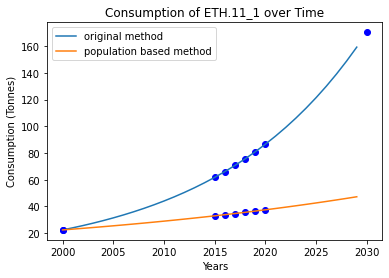

In [70]:
graph(2)

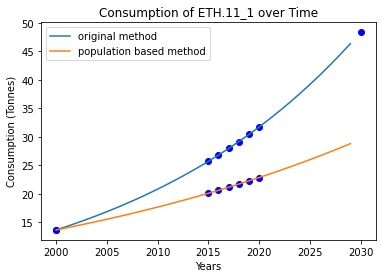

In [71]:
graph(3)

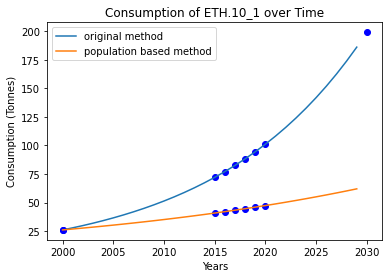

In [72]:
graph(30)

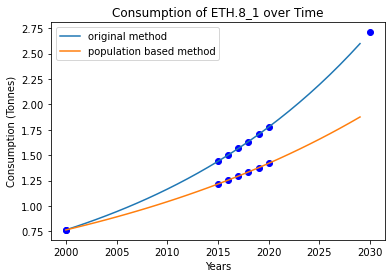

In [73]:
graph(130)

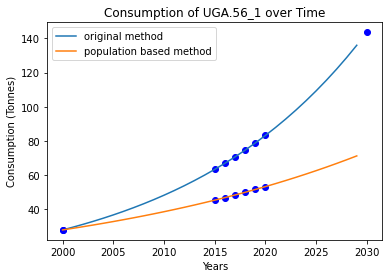

In [74]:
graph(1035)

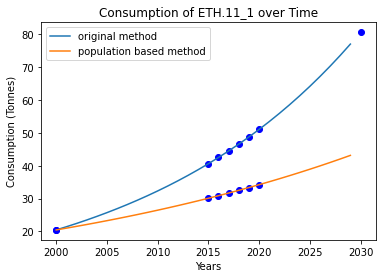

In [75]:
graph(2103)

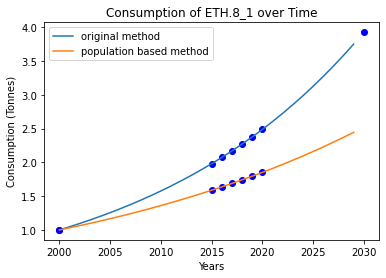

In [76]:
graph(2312)